# Gráficos
Geração de gráficos relacionados a NBR 5422

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import degrees, radians, sin, cos
from matplotlib import patches
from normaslt import types, nbr5422

In [2]:
# Efeito dos parâmetros em kafl
d = np.linspace(1.,10.,20)
t = np.linspace(0.,40.,5)
p = np.linspace(995.,1015.,3)
kafl = np.zeros((len(d), len(t), len(p)))
for i,tt in enumerate(t):
  for j,pp in enumerate(p):
    dr = nbr5422.dra(pp, tt)
    h = nbr5422.umidAbs(dr, tt)
    for k,dd in enumerate(d):
      kafl[k,i,j] = nbr5422.fatorAtmFrenteLenta(dr, h, dd)
leg=[]
plt.figure(figsize=[8,8])
for i,tt in enumerate(t):
  for j,pp in enumerate(p):
    plt.plot(d,kafl[:,i,j])
    leg.append(r'$t=$'+str(tt)+r'°C, $p=$'+str(pp)+'hPa')
plt.legend(leg,fontsize='x-small')
plt.xlabel(r'$d$ (m)')
plt.ylabel(r'$k_{afl}$')
plt.show()

AttributeError: module 'normaslt.nbr5422' has no attribute 'fatorAtmFrenteLenta'

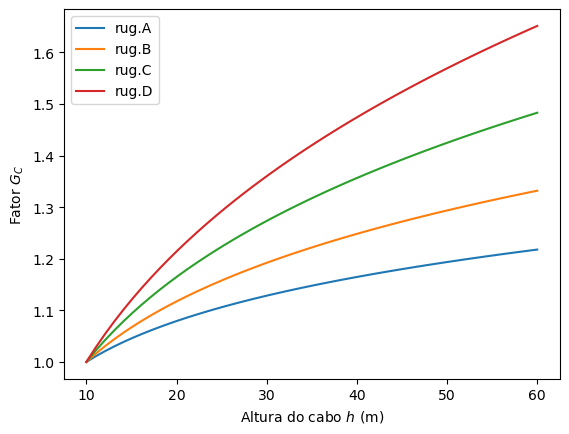

In [7]:
# Reprodução dos gráficos da seção 8
# Figura 16
h = np.linspace(10.,60.)
GC = np.zeros((4,len(h)))

for i,c in enumerate(types.rug):
  for j,hh in enumerate(h):
    GC[i,j] = nbr5422.fatCorrAlt(c, hh)

plt.figure
for i,c in enumerate(types.rug):
  plt.plot(h,GC[i,:])
plt.legend(types.rug)
plt.xlabel(r'Altura do cabo $h$ (m)')
plt.ylabel(r'Fator $G_C$')
plt.show()

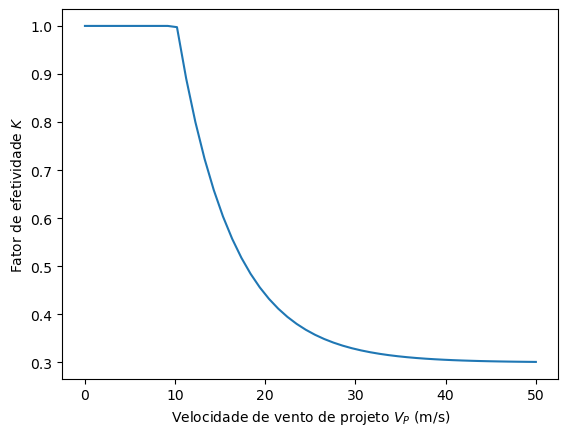

In [9]:
# Figura 22
v = np.linspace(0.,50.)
k = np.zeros(len(v))
for i,vv in enumerate(v):
  k[i] = nbr5422.fatEfetividadeVento(vv)

plt.figure
plt.plot(v,k)
plt.xlabel(r'Velocidade de vento de projeto $V_P$ (m/s)')
plt.ylabel(r'Fator de efetividade $K$')
plt.show()

## Balanço assincrono
Reprodução da Fig. 5.3 (p. 98) da Cigre TB 348

(3.873273909215562, 28.661247906473193, 18.75, 46.25)

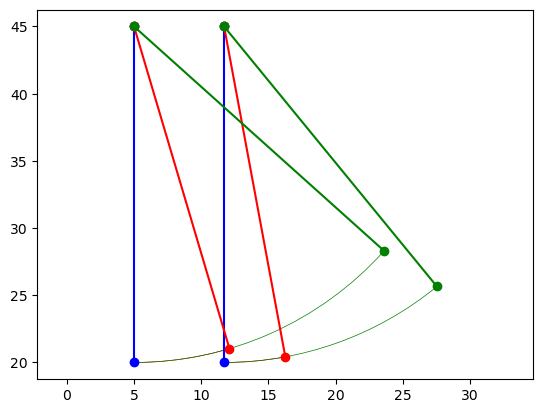

In [53]:
x1 = 5. # Posição horizontal da primeira fase na torre
x2 = x1 + 6.7 # Posição horizontal da segunda fase na torre
lc = 5. # Comprimento da cadeia (m)
f = 20. # Flecha (m)
h = 20. # clearance (m)
eb = 0.4 # Espaçamento do bundle (m)
dc = 32.85e-3 # Diâmetro do subcondutor (m) (ACSR Finch)
mc = 2.11 # Massa linear do subcondutor (kg/m)
mi = 300 # Massa da cadeia de isoladores (kg)
ai = 1.5 # Área de exposição da cadeia (m²)
Vv = 400 # Vão de vento (m)
Vp = 400 # Vão de peso (m)
Vp = 20. # Vento de projeto, 10 min, 10 m (m/s)
sigmavv = 0.14 # Coeficiente de variação

# Ventos de referência
# 20 m, 5 min
V205 = Vp * (20 / 10)**0.16 * 1.05
# 20 m, 10 min
V2010 = Vp * (20 / 10)**0.16

ang1a=radians(16.5)
ang1b=radians(10.5)
ang2a=radians(48.1)
ang2b=radians(39.3)
l = f + lc
plt.figure()
plt.plot([x1, x1], [h+l, h],'bo-')
plt.plot([x2, x2], [h+l, h],'bo-')

plt.plot([x1, x1+l*sin(ang1a)], [h+l, h+l*(1-cos(ang1a))],'ro-')
plt.plot([x2, x2+l*sin(ang1b)], [h+l, h+l*(1-cos(ang1b))],'ro-')
a1a = patches.Arc((x1, h+l), 2*l, 2*l, theta1=-90., theta2=degrees(ang1a)-90.,lw=0.5,color='r')
a1b = patches.Arc((x2, h+l), 2*l, 2*l, theta1=-90., theta2=degrees(ang1b)-90.,lw=0.5,color='r')
plt.gca().add_patch(a1a)
plt.gca().add_patch(a1b)
plt.plot([x1, x1+l*sin(ang2a)], [h+l, h+l*(1-cos(ang2a))],'go-')
plt.plot([x2, x2+l*sin(ang2b)], [h+l, h+l*(1-cos(ang2b))],'go-')
a2a = patches.Arc((x1, h+l), 2*l, 2*l, theta1=-90., theta2=degrees(ang2a)-90.,lw=0.5,color='g')
a2b = patches.Arc((x2, h+l), 2*l, 2*l, theta1=-90., theta2=degrees(ang2b)-90.,lw=0.5,color='g')
plt.gca().add_patch(a2a)
plt.gca().add_patch(a2b)
plt.axis('equal')
plt.show()